In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/valid_data.csv")
print(df.dtypes)

indicator                     str
group                         str
state                         str
subgroup                      str
phase                     float64
time period                 int64
time period label             str
time period start date        str
time period end date          str
value                     float64
lowci                     float64
highci                    float64
confidence interval           str
quartile range                str
dtype: object


In [11]:
df["indicator"].dropna().unique()

<StringArray>
[                                                      'Received Counseling or Therapy, Last 4 Weeks',
                                       'Took Prescription Medication for Mental Health, Last 4 Weeks',
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
                                      'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
Length: 4, dtype: str

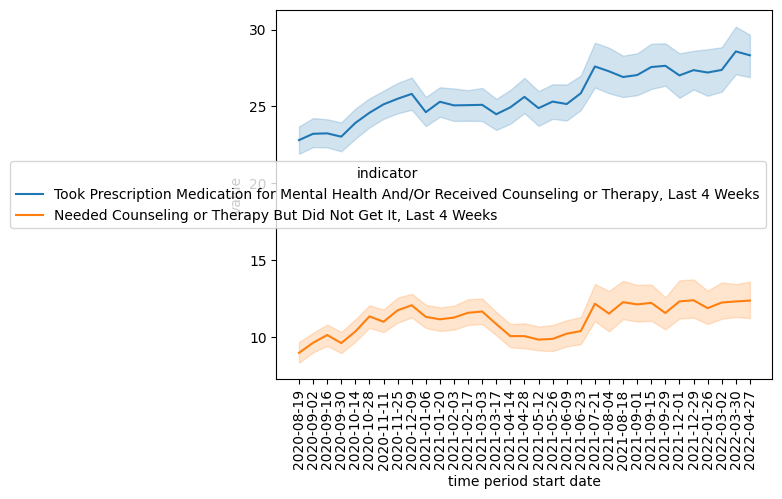

In [24]:
df_useful = df[(df["indicator"] == "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks") | (df['indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')]
ex = sns.lineplot(data=df_useful, x="time period start date", y="value", hue='indicator')
ex.tick_params(axis='x', rotation=90)

In [ ]:
ex = sns.lineplot(data=df,x='time period start date', y='value', hue= 'state', hue_order=['Georgia', 'Alaska','New York'])
ex.tick_params(axis='x', rotation=90)


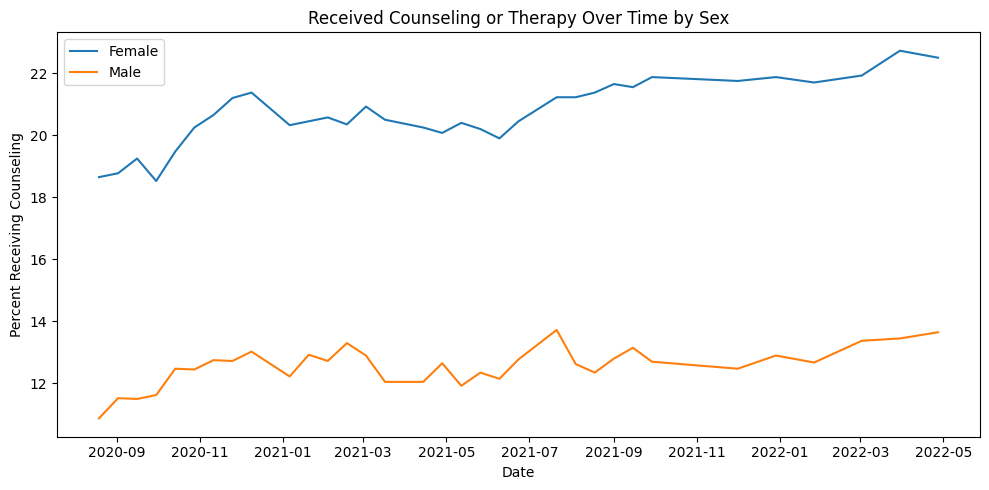

In [ ]:
#did therapy usage increase or decrease over time?(by sex) 

df["time period start date"] = pd.to_datetime(df["time period start date"])

# Filter for sex groups
sex_df = df[df["group"] == "By Sex"]

# Pivot for plotting
pivot = sex_df.pivot_table(index="time period start date",
                      columns="subgroup",
                      values="value",
                      aggfunc="mean")

# Plot
plt.figure(figsize=(10,5))
plt.plot(pivot.index, pivot)
plt.xlabel("Date")
plt.ylabel("Percent Receiving Counseling")
plt.title("Received Counseling or Therapy Over Time by Sex")
plt.legend(pivot.columns)
plt.tight_layout()
plt.show()
